In [1]:
!pip install tensorflow==2.4.0

     |████████████████████████████████| 394.7 MB 18 kB/s 
     |████████████████████████████████| 2.9 MB 31.5 MB/s 
     |████████████████████████████████| 3.8 MB 34.3 MB/s 
     |████████████████████████████████| 462 kB 49.9 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.40.0
    Uninstalling grpcio-1.40.0:
      Successfully uninstalled grpcio-1.40.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.

In [2]:
!pip install autokeras

     |████████████████████████████████| 166 kB 5.5 MB/s 
     |████████████████████████████████| 97 kB 7.2 MB/s 


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
tf.__version__

'2.4.0'

In [4]:
import autokeras as ak

In [5]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [7]:
Labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
print(f'{train_images.shape} {test_images.shape} {train_labels} {test_labels}')

(60000, 28, 28) (10000, 28, 28) [9 0 0 ... 3 0 5] [9 2 1 ... 8 1 5]


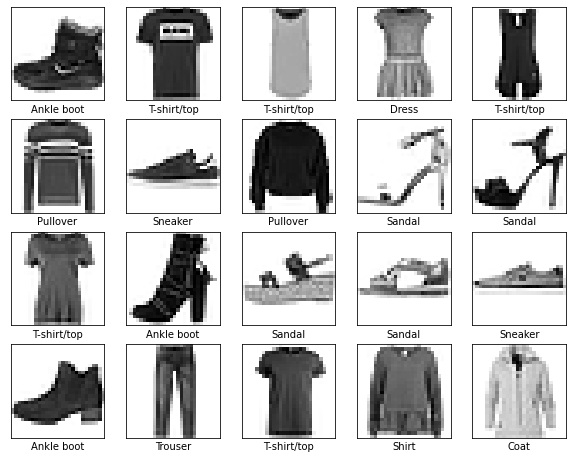

In [9]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(Labels[train_labels[i]])
plt.show()

In [10]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [11]:
#INSERT YOUR MODEL CODE HERE
#YOU CAN ALSO CHANGE THE CODE BELOW TO COMPILE AND RUN THE MODEL
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(layers.BatchNormalization(center = True, scale = False))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (2, 2), activation='relu', padding='same')) 
model.add(layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
model.add(layers.BatchNormalization(center = True, scale = False))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
model.add(layers.BatchNormalization(center = True, scale = False))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization(center = True, scale = False))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 41s 12ms/step - loss: 0.6372 - accuracy: 0.7725 - val_loss: 0.3530 - val_accuracy: 0.8759
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3266 - accuracy: 0.8818 - val_loss: 0.2776 - val_accuracy: 0.9003
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2817 - accuracy: 0.8978 - val_loss: 0.2442 - val_accuracy: 0.9134
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2473 - accuracy: 0.9106 - val_loss: 0.2356 - val_accuracy: 0.9143
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2327 - accuracy: 0.9144 - val_loss: 0.2343 - val_accuracy: 0.9134
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2137 - accuracy: 0.9236 - val_loss: 0.2581 - val_accuracy: 0.9101
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1949 - accuracy: 0.9291 - val_loss: 0.2914 -

313/313 - 1s - loss: 0.2058 - accuracy: 0.9274


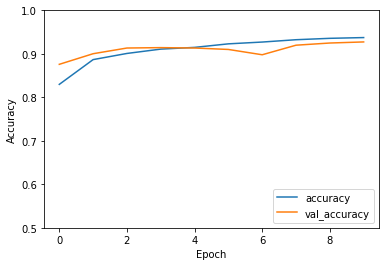

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [14]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9273999929428101


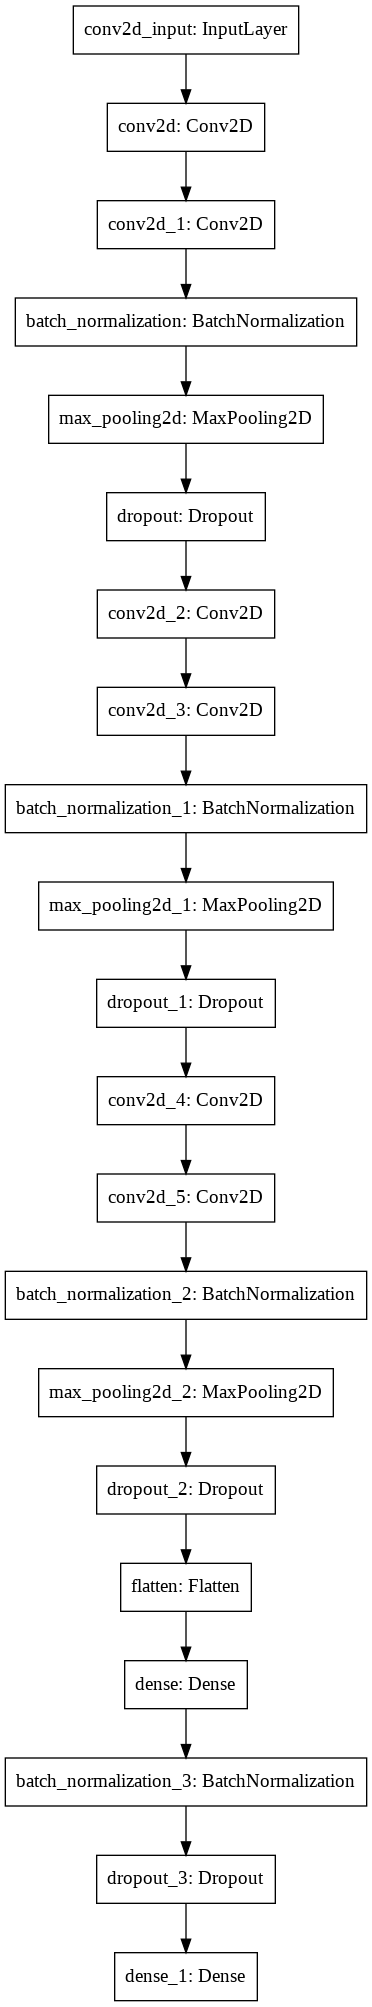

In [15]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)